In [30]:
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")
df=pd.read_csv("HR.csv")
print(df)


       satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272            

In [31]:
print(df.to_string())

       satisfaction_level  last_evaluation  number_project  average_montly_hours  time_spend_company  Work_accident  left  promotion_last_5years   Department  salary
0                    0.38             0.53               2                   157                   3              0     1                      0        sales     low
1                    0.80             0.86               5                   262                   6              0     1                      0        sales  medium
2                    0.11             0.88               7                   272                   4              0     1                      0        sales  medium
3                    0.72             0.87               5                   223                   5              0     1                      0        sales     low
4                    0.37             0.52               2                   159                   3              0     1                      0        sales     low
5   

In [32]:
left=df[df['left']==1]
left.shape

(3571, 10)

In [33]:
retain=df[df['left']==0]
retain.shape

(11428, 10)

In [34]:
newdf =df.drop(columns=['Department','salary','average_montly_hours','Work_accident'])
newdf.groupby('left').mean()

satisfaction_level  last_evaluation  number_project  time_spend_company  \
left                                                                            
0               0.666810         0.715473        3.786664            3.380032   
1               0.440098         0.718113        3.855503            3.876505   

      promotion_last_5years  
left                         
0                  0.026251  
1                  0.005321

<Axes: xlabel='salary'>

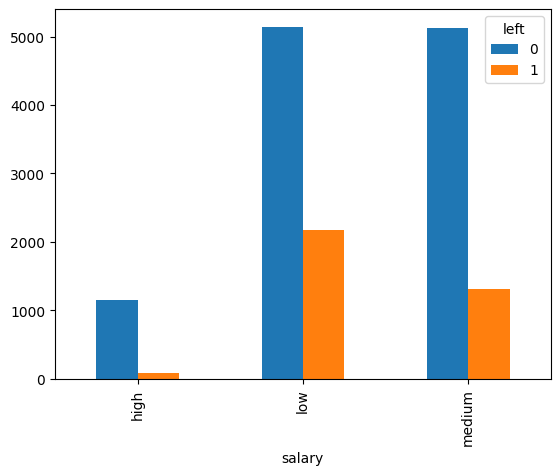

In [35]:
pd.crosstab(df['salary'],df['left']).plot(kind='bar')


<Axes: xlabel='average_montly_hours'>

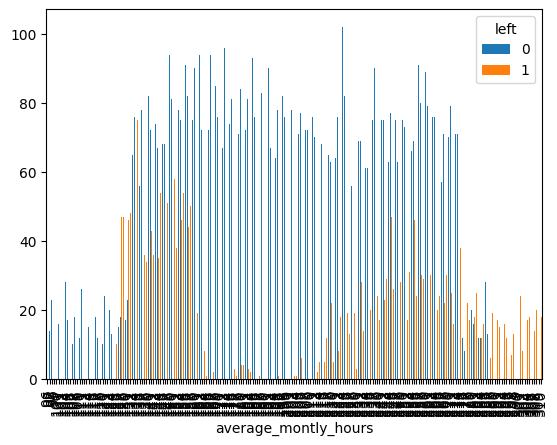

In [36]:
pd.crosstab(df['average_montly_hours'],df['left']).plot(kind='bar')

<Axes: xlabel='Department'>

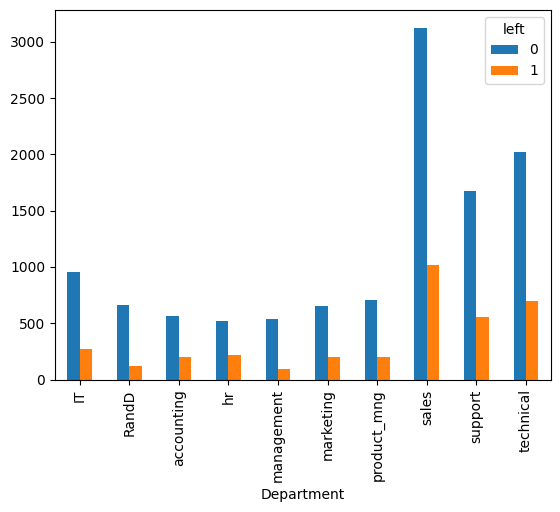

In [37]:
pd.crosstab(df['Department'],df['left']).plot(kind='bar')

<Axes: xlabel='Work_accident'>

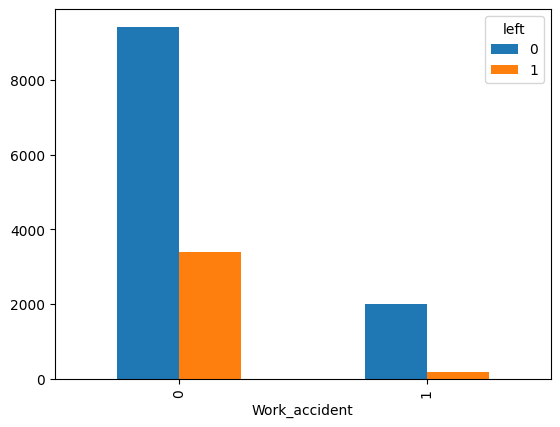

In [38]:
pd.crosstab(df['Work_accident'],df['left']).plot(kind='bar')

In [39]:
trainx = df.drop(columns = ["last_evaluation","number_project","time_spend_company","Work_accident","Department","salary","left"])
trainy = df[["left"]]
print(trainx.head(50))
print(trainy.head(50))

    satisfaction_level  average_montly_hours  promotion_last_5years
0                 0.38                   157                      0
1                 0.80                   262                      0
2                 0.11                   272                      0
3                 0.72                   223                      0
4                 0.37                   159                      0
5                 0.41                   153                      0
6                 0.10                   247                      0
7                 0.92                   259                      0
8                 0.89                   224                      0
9                 0.42                   142                      0
10                0.45                   135                      0
11                0.11                   305                      0
12                0.84                   234                      0
13                0.41                   148    

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(trainx,trainy,test_size = 0.15)
print(x_train.to_string())

       satisfaction_level  average_montly_hours  promotion_last_5years
13687                0.50                   142                      0
9741                 0.18                   213                      0
12979                0.83                   264                      0
5270                 0.46                   172                      0
11759                0.74                   166                      1
9594                 0.57                   162                      0
7979                 0.53                   140                      0
6329                 0.95                   233                      0
9742                 0.63                   145                      0
14010                0.72                   256                      1
12622                0.10                   247                      0
7535                 0.45                   143                      0
11574                0.49                   161                      0
3778  

In [41]:
print(y_train.to_string())

       left
13687     0
9741      0
12979     0
5270      0
11759     0
9594      0
7979      0
6329      0
9742      0
14010     0
12622     1
7535      0
11574     0
3778      0
5042      0
12599     1
1597      1
12333     1
13372     0
5442      0
86        1
8767      0
2623      0
1353      1
1937      1
5915      0
11663     0
1288      1
5435      0
1519      1
10630     0
12195     1
12630     1
11879     0
8103      0
5561      0
13648     0
2208      0
12248     1
14803     1
12169     1
10000     0
6004      0
9780      0
3365      0
4625      0
9674      0
13862     0
14251     1
9131      0
6638      0
9726      0
9415      0
2940      0
7695      0
1943      1
7377      0
2094      0
13854     0
4241      0
324       1
13605     0
2333      0
3968      0
4136      0
14950     1
13086     0
7383      0
1106      1
11803     0
9623      0
4016      0
718       1
2892      0
1516      1
5971      0
1698      1
5874      0
3598      0
6448      0
2361      0
6955      0
6531

In [42]:
print(x_test.to_string())

       satisfaction_level  average_montly_hours  promotion_last_5years
2853                 0.55                   267                      0
6250                 0.49                   136                      0
13271                0.70                   173                      0
11812                0.82                   210                      0
10887                0.84                   266                      0
924                  0.42                   147                      0
14382                0.41                   160                      1
8729                 0.60                   249                      0
11458                0.71                   179                      1
7724                 0.51                   272                      0
2374                 0.57                   164                      0
5106                 0.53                   175                      0
9900                 0.63                   177                      0
10739 

In [43]:
modeltraintest = LogisticRegression()
modeltraintest.fit(x_train,y_train)

LogisticRegression()

In [44]:
ans = modeltraintest.predict(x_test)
print(ans)

[0 0 0 ... 0 1 1]
